In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset Creation

In [2]:
index_id=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/index_id.csv')
index_id=index_id[index_id['Student Id']==170104124]['Index Id'].values[0]
index_id

312

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Matrix_Factorization_Assignment.csv')
df.shape

(45000, 5001)

Removing all rows that satisfy row index % index id = 0

In [4]:
df=df[df['Index']%index_id!=0]
df.shape

(44857, 5001)

Removing all columns that satisfy column index % index id = 0

In [5]:
cols_list=df.columns[2:].tolist()
cols_list = list(filter(lambda x: int(x) % index_id == 0,cols_list))
cols_list

['312',
 '624',
 '936',
 '1248',
 '1560',
 '1872',
 '2184',
 '2496',
 '2808',
 '3120',
 '3432',
 '3744',
 '4056',
 '4368',
 '4680',
 '4992']

In [6]:
df=df.drop(cols_list,axis=1)
print(df.shape)

(44857, 4985)


## Implementation

In [7]:
X=df.drop('Index',axis=1)

In [8]:
N,M=X.shape
print(N,M)

44857 4984


In [9]:
def matrix_factorization(K_list,itr):
  for K in K_list:
    U=np.random.rand(N,K)
    U_norm = Normalizer(norm='l2').fit(U)
    U = U_norm.transform(U)
    lam_u=(0.00015 + 0.0001 * (index_id % 8))
    lam_v=(0.00025 - 0.0001 * (index_id % 7))
    Loss[K]=[]
    error=0
    error_diff=0
    print(f'\n==============For {K} Latent Factors=====================')
    for i in range(itr):
      V=np.dot(np.linalg.inv(np.dot(U.T,U)+lam_v*np.identity(K)),np.dot(X.fillna(0).T,U).T)
      U=np.dot(np.linalg.inv(np.dot(V,V.T)+lam_u*np.identity(K)),np.dot(X.fillna(0),V.T).T).T
      L=np.nansum(np.square(X-np.dot(U,V)))/np.nansum(X.count())
      Loss[K].append(L)
      print(f'Iteration-{i}: Loss={L}')
      if(math.floor(L)==0 or (len(Loss[K])%10==0 and abs(Loss[K][-1]-Loss[K][-10])<0.1)):
        UxV[K]=np.dot(U,V)
        break

In [10]:
K_list=[10,20,25]

In [11]:
Loss={}
UxV={}
matrix_factorization(K_list,800)


==============For 10 Latent Factors=====================
Iteration-0: Loss=13.79773072900103
Iteration-1: Loss=13.792611290717785
Iteration-2: Loss=13.789291985166923
Iteration-3: Loss=13.78720001986388
Iteration-4: Loss=13.785811060882878
Iteration-5: Loss=13.784832297385373
Iteration-6: Loss=13.784108122445721
Iteration-7: Loss=13.783551575753663
Iteration-8: Loss=13.783110870296552
Iteration-9: Loss=13.782753391597328

==============For 20 Latent Factors=====================
Iteration-0: Loss=13.762837739519858
Iteration-1: Loss=13.752075866702647
Iteration-2: Loss=13.745104686844995
Iteration-3: Loss=13.740717806658505
Iteration-4: Loss=13.73780544187576
Iteration-5: Loss=13.735750054534975
Iteration-6: Loss=13.734225028440479
Iteration-7: Loss=13.733048963573042
Iteration-8: Loss=13.732114473997163
Iteration-9: Loss=13.731354193872436

==============For 25 Latent Factors=====================
Iteration-0: Loss=13.745550937643095
Iteration-1: Loss=13.731912382892281
Iteration-2: Lo

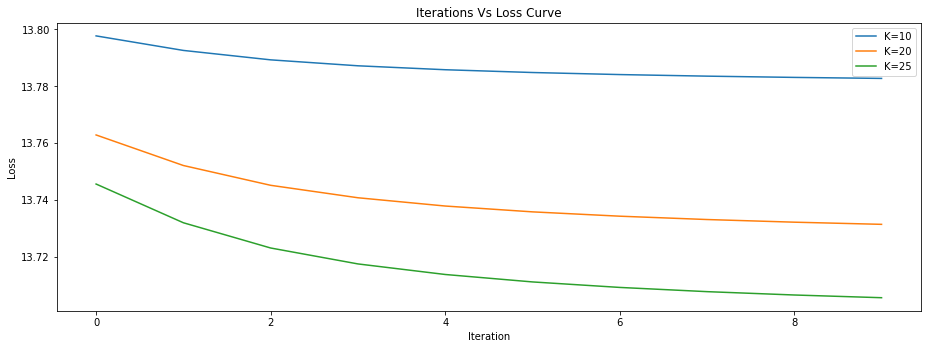

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
for K in list(Loss.keys()):
  ax.plot(np.arange(0,len(Loss[K])), Loss[K], label="K="+str(K))
ax.set_title('Iterations Vs Loss Curve')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')
ax.legend()

In [13]:
minimum_loss_K=(0,10000.0)
for K in list(Loss.keys()):
  if(minimum_loss_K[1]>min(Loss[K])):
    minimum_loss_K=(K,min(Loss[K]))

In [14]:
K=minimum_loss_K[0]
K

25

In [15]:
'''
input_df=X
input_df = input_df.notnull().astype('int')
input_df.loc[~input_df.isnull()] = 0  # not nan
input_df.loc[input_df.isnull()] = 1   # nan
'''

"\ninput_df=X\ninput_df = input_df.notnull().astype('int')\ninput_df.loc[~input_df.isnull()] = 0  # not nan\ninput_df.loc[input_df.isnull()] = 1   # nan\n"